# <span style="background-color: orange; color: black; padding: 5px; border-radius: 5px;">Customer Sentiment Analysis - Flipkart</span>

![alt text](flipkart-india-logo-tagline-coupon-india-854844c018b48dd05b8967e15b2b5172-1.png)

## <span style="background-color: white; color: black; padding: 5px; border-radius: 5px;">Objective</span>

As a Data Analyst at Flipkart, you have been tasked with gauging customer sentiment towards the iPhone 15 128GB model. The primary goal of this project is to analyze public perception and evaluate customer reactions by performing sentiment analysis on product reviews posted by users. By extracting and processing customer reviews, you will derive insights about the overall sentiment (positive or negative) surrounding the product, which can be useful for decision-making, improving customer experience, and identifying key areas for product improvement.


## <span style="background-color: white; color: black; padding: 5px; border-radius: 5px;">Tasks</span>

### <span style="background-color: brown; color: white; padding: 5px; border-radius: 5px;">1. Data Collection (Web Scraping)</span>

**Tool:** Selenium and BeautifulSoup  

**Task:** Scrape at least 300 customer reviews from Flipkart's product page for the iPhone 15 128GB model. Each review should include:  
- **Username:** The name of the reviewer.
- **City:** The city of the reviewer. 
- **Date:** The date of purchase of the reviewer.
- **Rating:** The rating provided by the user (1 to 5 stars).  
- **Review Text:** The content of the customer's review, which may contain valuable information regarding their experience with the product.  

---

#### **Steps:**

1. **Set Up Selenium:**  
   - Automate browser interactions and navigate to Flipkart’s product page for the iPhone 15 128GB.  

2. **Extract Reviews with BeautifulSoup:**  
   - Parse the HTML of the reviews using BeautifulSoup and extract the relevant details:  
     - **Username**
     - **City**
     - **Date**
     - **Rating**  
     - **Review Text**

3. **Handle Pagination:**  
   - Ensure the scraper is capable of navigating through multiple pages to retrieve a comprehensive dataset of at least 300 reviews.  

In [2]:
# Import the necessary librariess
import requests
import time
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [7]:
# Create empty lists to store the user data such as Name, City, Date of Purchase, Review & Rating
Names = []
Cities = []
Dates = []
Reviews = []
Ratings = []

# Assign the url of the flipkart website and use selenium to scrape data
url = """https://www.flipkart.com/apple-iphone-15-blue-128-gb/product-reviews/itmbf14ef54f645d?pid=MOBGTAGPAQNVFZZY&lid=LSTMOBGTAGPAQNVFZZYQRLPCQ&marketplace=FLIPKART"""
driver = webdriver.Chrome()
driver.get(url)


while len(Names) < 320:

    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Scrape names
    temp_names = soup.find_all("p", {"class": "_2NsDsF AwS1CA"})
    for name in temp_names:
        Names.append(name.text)

    # Scrape cities
    temp_cities = soup.find_all("p", {"class": "MztJPv"}) 
    for city in temp_cities:
        Cities.append(city.text)

    # Scrape dates
    temp_dates = soup.find_all("p", {"class": "_2NsDsF"}) 
    for date in temp_dates:
        Dates.append(date.text)
    Actual_Dates = Dates[1::2]

    # Scrape reviews
    temp_reviews = soup.find_all("div", {"class": "ZmyHeo"})
    for review in temp_reviews:
        Reviews.append(review.text)

    # Scrape ratings
    temp_ratings = soup.find_all("div", class_ = "XQDdHH Ga3i8K")
    for ratings in temp_ratings:
        Ratings.append(ratings.text)

    # Try to click the "Next" button
    try:
        next_button = driver.find_element(By.XPATH, "//span[text()='Next']")
        next_button.click()
        time.sleep(5)
    except:
        break


In [39]:
# Combine data into a DataFrame
data = pd.DataFrame({
    "Name": Names[:-1],
    "City": Cities[:-1],
    "Date": Actual_Dates[:-1],
    "Review": Reviews[:-1],
    "Ratings": Ratings
})

# Save to a CSV files
data.to_csv("flipkart_reviews_2.csv", index=False)

### <span style="background-color: brown; color: white; padding: 5px; border-radius: 5px;">2. Data Cleaning and Preprocessing</span>

**Tool:** Pandas  

**Task:** Clean and preprocess the scraped data for analysis.  

---

#### **Steps:**

1. **Remove Duplicates:**  
   - Eliminate any duplicate reviews to ensure data quality.  

2. **Handle Missing Values:**  
   - Address missing or incomplete data, such as missing review text or rating, by either:  
     - Removing rows with missing values.  
     - Filling in missing values if applicable.  

3. **Text Preprocessing:**  
   - **Convert to Lowercase:** Standardize the text by converting all review text to lowercase.  
   - **Remove Irrelevant Characters:** Strip out special characters, punctuation, and extra spaces.  

In [3]:
# Assign the scraped dataset(csv file) to a dataframe
new_data = pd.read_csv('flipkart_reviews.csv')
new_data

,Name,City,Date,Review,Ratings
0,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,bijaya mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
...,...,...,...,...,...
318,bijaya mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
319,Devjyoti Das,"Certified Buyer, Dhubri",10 months ago,Amazing phone just no words to say...just one ...,5
320,manish choudhary,"Certified Buyer, Udaipur",11 months ago,I was sceptical at first about moving form an ...,5
321,Rahul Saini,"Certified Buyer, Gangapur City",11 months ago,Loved itREAD MORE,5


In [4]:
# Check the basic info of the dataframe
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     323 non-null    object
 1   City     323 non-null    object
 2   Date     323 non-null    object
 3   Review   323 non-null    object
 4   Ratings  323 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 12.7+ KB


In [5]:
# Check valye counts of the Name column
new_data['Name'].value_counts()

Name
Flipkart Customer        21
Gaurav Verma              2
NOOR ALAM                 2
santosh  parida           2
Gulshan  Ahmed            2
                         ..
Mohan  Karthik            1
Saurabh Gothwad           1
Sheetla Prasad Maurya     1
Akshay Meena              1
Prashanth r               1
Name: count, Length: 285, dtype: int64

In [6]:
# Drop the duplicates from the dataframe
new_data = new_data.copy()
new_data = new_data.drop_duplicates()
new_data

,Name,City,Date,Review,Ratings
0,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,bijaya mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5
...,...,...,...,...,...
317,aditya verma,"Certified Buyer, Khairagarh",10 months ago,Most value for money iPhone ever.READ MORE,5
319,Devjyoti Das,"Certified Buyer, Dhubri",10 months ago,Amazing phone just no words to say...just one ...,5
320,manish choudhary,"Certified Buyer, Udaipur",11 months ago,I was sceptical at first about moving form an ...,5
321,Rahul Saini,"Certified Buyer, Gangapur City",11 months ago,Loved itREAD MORE,5


In [7]:
# Convert the Name column data into Title Case
new_data['Name'] = new_data['Name'].str.title()
new_data.head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,"Certified Buyer, Jaipur","Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,"Certified Buyer, Matialihat","Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,"Certified Buyer, Baleshwar",6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,"Certified Buyer, Bokajan","Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,"Certified Buyer, Balaghat","Oct, 2023",High quality camera😍READ MORE,5


In [8]:
# Clean data of City column by removing unwanted characters/ part of string
new_data['City'] = new_data['City'].str.replace("Certified Buyer, ", "", regex=False).str.strip()
new_data.head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,Jaipur,"Nov, 2023","So beautiful, so elegant, just a vowww😍❤️READ ...",5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",Very niceREAD MORE,4
2,Bijaya Mohanty,Baleshwar,6 months ago,Just go for it.Amazing one.Beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",Camera Quality Is Improved Loving ItREAD MORE,5
4,Ajin V,Balaghat,"Oct, 2023",High quality camera😍READ MORE,5


In [9]:
# Clean data of Review column by removing unwanted characters/ part of string and converting to lowercase
new_data['Review'] = new_data['Review'].str.lower().str.replace("read more", "", regex=False)
new_data.head()

,Name,City,Date,Review,Ratings
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5


### <span style="background-color: brown; color: white; padding: 5px; border-radius: 5px;">3. Sentiment Analysis</span>

**Tool:** TextBlob  

**Task:** Analyze the sentiment of each review to classify them as either positive or negative.  

---

#### **Steps:**

1. **Perform Sentiment Analysis:**  
   - Use `TextBlob` to analyze the sentiment of each review text.  
   - Extract the following scores from `TextBlob`:  
     - **Polarity:** A score between -1 (negative) and +1 (positive).  
     - **Subjectivity:** A measure of how subjective or objective the text is.  

2. **Define Sentiment Thresholds:**
   - **Extremely Positive Sentiment:** Polarity score > 0.75 
   - **Positive Sentiment:** 0 < Polarity score <= 0.75
   - **Neutral Sentiment:** Polarity score = 0
   - **Negative Sentiment:** -0.75 <= Polarity score < 0
   - **Extremely Negative Sentiment:** Polarity score < -0.75 

4. **Store Sentiment Classification:**  
   - Add a new column in the dataset to store the sentiment classification for each review as either **Extremely Positive**, **Positive**, **Neutral**, **Negative** or **Extremely Negative**.  

In [10]:
# Import libraries for Sentimental analysis of review sentences 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import string

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ethen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Create a column called Reviews_t that stores tokenized sentences from the Review column using the sent_tokenize function.
new_data["Reviews_t"] = new_data['Review'].apply(sent_tokenize)
new_data

,Name,City,Date,Review,Ratings,Reviews_t
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]"
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice]
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it]
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍]
...,...,...,...,...,...,...
317,Aditya Verma,Khairagarh,10 months ago,most value for money iphone ever.,5,[most value for money iphone ever.]
319,Devjyoti Das,Dhubri,10 months ago,amazing phone just no words to say...just one ...,5,[amazing phone just no words to say...just one...
320,Manish Choudhary,Udaipur,11 months ago,i was sceptical at first about moving form an ...,5,[i was sceptical at first about moving form an...
321,Rahul Saini,Gangapur City,11 months ago,loved it,5,[loved it]


In [12]:
# Import mean from statistics for basic statistics
from statistics import mean

# Function created for assigning Polarity to the Reviews_t column
def get_polarity(sentences):
    return [TextBlob(sentence).sentiment.polarity for sentence in sentences]

# Calls get_polarity function on the Reviews_t column to assign polarity
new_data['Polarity'] = new_data['Reviews_t'].apply(get_polarity)

# Function created to calculate the average polarity of each review (Average of polarity for each sentences in a review)
def calculate_average_polarity(polarities):
    return mean(polarities) if polarities else 0

# Calls calculate_average_polarity function on the Polarity column to assign the average polarity for each review
new_data['Average_Polarity'] = new_data['Polarity'].apply(calculate_average_polarity)
new_data['Average_Polarity'] = new_data['Average_Polarity'].round(2)
new_data.head(10)

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16
5,Sheetla Prasad Maurya,Sultanpur,"Oct, 2023",best mobile phonecamera quality is very nice b...,4,[best mobile phonecamera quality is very nice ...,[0.738],0.74
6,Kriti Customer,Sarkaghat,10 months ago,"just loved the product , colour , design is wo...",5,"[just loved the product , colour , design is w...",[0.4125],0.41
7,Flipkart Customer,Aizawl,10 months ago,awesome photography experience. battery backup...,5,"[awesome photography experience., battery back...","[1.0, 0.7, 0.5]",0.73
8,Nikhil Kumar,Meerut Division,10 months ago,switch from oneplus to iphone i am stunned wit...,5,[switch from oneplus to iphone i am stunned wi...,"[0.0, 1.0]",0.50
9,Rahul Shedge,Satara,"Oct, 2023",totally happy!camera 5battery 5 display 5design 5,5,[totally happy!camera 5battery 5 display 5desi...,[0.0],0.00


In [13]:
# Function to assign the Class to the Polarity
def sentiment_class(polarity):
    if polarity > 0.75:
        return 'extremely positive'
    elif 0 < polarity <= 0.75:
        return 'positive'
    elif polarity == 0:
        return 'neutral'
    elif -0.75 <= polarity < 0:
        return 'negative'
    else:
        return 'extremely negative'

# Calls sentiment_class function on the Average_Polarit column to assign the sentiment class
new_data['Sentiment_Class'] = new_data['Average_Polarity'].apply(sentiment_class)

In [14]:
new_data.head()

,Name,City,Date,Review,Ratings,Reviews_t,Polarity,Average_Polarity,Sentiment_Class
0,Akshay Meena,Jaipur,"Nov, 2023","so beautiful, so elegant, just a vowww😍❤️",5,"[so beautiful, so elegant, just a vowww😍❤️]",[0.675],0.68,positive
1,Mousam Guha Roy,Matialihat,"Oct, 2023",very nice,4,[very nice],[0.78],0.78,extremely positive
2,Bijaya Mohanty,Baleshwar,6 months ago,just go for it.amazing one.beautiful camera wi...,5,[just go for it.amazing one.beautiful camera w...,[0.26666666666666666],0.27,positive
3,Prithivi Boruah,Bokajan,"Oct, 2023",camera quality is improved loving it,5,[camera quality is improved loving it],[0.6],0.60,positive
4,Ajin V,Balaghat,"Oct, 2023",high quality camera😍,5,[high quality camera😍],[0.16],0.16,positive


In [15]:
# Calculates and prints the overall average polarity score of the entire dataset of reviews
polarity_score = new_data['Average_Polarity'].mean().round(2)
print(f'Average Polarity Score : {polarity_score}')
if polarity_score > 0.75:
        print('The Average Polarity Score is Extremely Positive')
elif 0 < polarity_score <= 0.75:
    print('The Average Polarity Score is Positive')
elif polarity_score == 0:
    print('The Average Polarity Score is Neutral')
elif -0.75 <= polarity_score < 0:
    print('The Average Polarity Score is Negative')
else:
    print('The Average Polarity Score is Extremely Negative')

Average Polarity Score : 0.52
The Average Polarity Score is Positive


### <span style="background-color: brown; color: white; padding: 5px; border-radius: 5px;">4. Data Analysis and Insights</span>

**Tool:** Pandas and Matplotlib/Seaborn for Visualization  

**Task:** Perform an analysis on the sentiment of reviews and extract actionable insights.  

---

#### **Steps:**

1. **Sentiment Distribution:**  
   - Calculate the overall distribution of positive and negative sentiments for the 300 reviews.  
   - Visualize the distribution using a bar chart or pie chart.  

2. **Average Rating vs Sentiment:**  
   - Analyze if there is a correlation between the numeric ratings (1-5 stars) and sentiment polarity.  
   - Use scatter plots or box plots to determine if higher ratings correspond with more positive sentiments.  

3. **Word Cloud:**  
   - Create separate word clouds for positive and negative reviews to identify the most frequently mentioned words.  
   - Use libraries like `WordCloud` to generate the visualizations.  

4. **Review Length Analysis:**  
   - Calculate the length of each review (number of words).  
   - Investigate if longer reviews are associated with more detailed sentiments, either positive or negative.  
   - Use histograms or box plots to visualize the relationship between review length and sentiment.  

In [16]:
# Imports libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

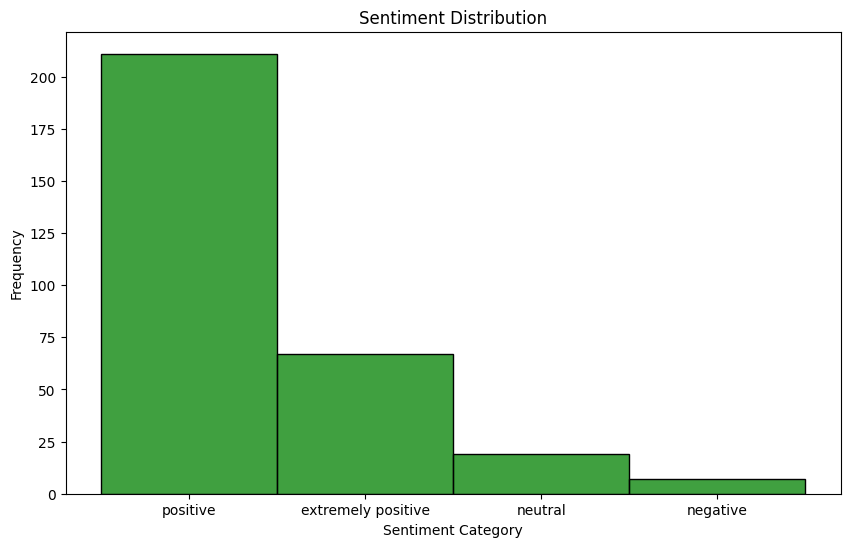

In [17]:
# Plots figure for Sentiment Distribution based on Sentiment Category
plt.figure(figsize=(10, 6))
sns.histplot(x=new_data.Sentiment_Class, color='green')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<u>**Sentiment Distribution**</u>

This bar chart displays the distribution of sentiment categories within a dataset. The x-axis represents different sentiment categories, while the y-axis represents the frequency of occurrences in each category. The categories include:

1. **Positive**: This category has the highest frequency, with over 200 instances.
2. **Extremely Positive**: This category comes next, with a significantly lower frequency compared to "Positive".
3. **Neutral**: This category has a much smaller frequency than the previous two.
4. **Negative**: This category has the lowest frequency.

The chart indicates a clear bias towards positive sentiments in the dataset, with "Positive" being the dominant category, followed by "Extremely Positive". Neutral and negative sentiments are comparatively rare.


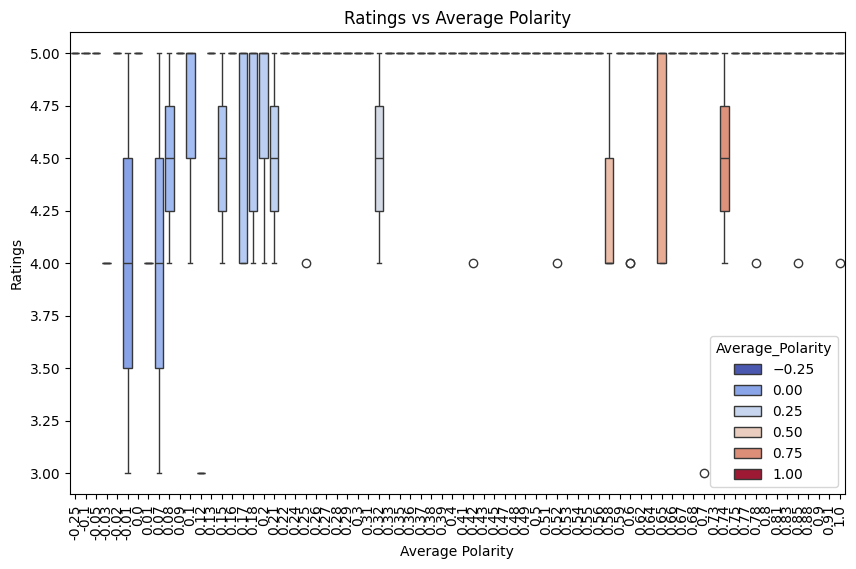

In [18]:
# Plotting ratings vs average polarity
plt.figure(figsize=(10, 6))
sns.boxplot(x='Average_Polarity', y='Ratings', data = new_data, hue = 'Average_Polarity', palette='coolwarm')
plt.title('Ratings vs Average Polarity')
plt.xlabel('Average Polarity')
plt.ylabel('Ratings')
plt.xticks(rotation=90)
plt.show()

**<u>Correlation</u>:**
- **Higher sentiment polarities align closely with higher ratings** (e.g., 4.5–5), as evident from the clustering and color gradient.

**<u>Neutral Reviews</u>:**
- **Neutral categories show a balanced spread across various ratings**, indicating less agreement between sentiment and star ratings.

**<u>Negative Reviews</u>:**
- **Negative and extremely negative reviews often have lower average ratings** but may still exhibit variability due to subjective interpretation by reviewers.


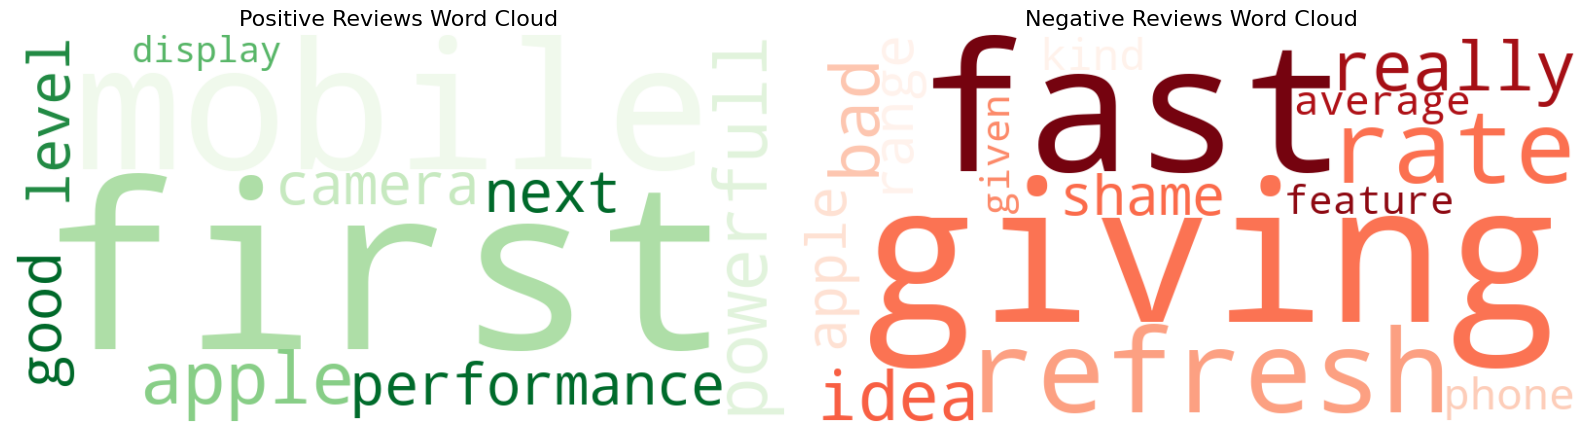

In [43]:
from wordcloud import WordCloud


positive_reviews = []
negative_reviews = []

# Classify the positive & negative reviews separately
for i in range(len(new_data)):
    if new_data.iloc[i]['Sentiment_Class'] == 'positive' or new_data.iloc[i]['Sentiment_Class'] == 'extremely positive':
        positive_reviews.append(new_data.iloc[i]['Review'])
    elif new_data.iloc[i]['Sentiment_Class'] == 'negative' or new_data.iloc[i]['Sentiment_Class'] == 'extremely negative':
        negative_reviews.append(new_data.iloc[i]['Review'])

# Assign random positive and negative reviews to create a cloud map
pos = positive_reviews[240]
neg = negative_reviews[1]

# Generate word clouds for positive and negative reviews
positive_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(pos)
negative_wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(neg)

# Plot the word clouds
plt.figure(figsize=(16, 8))

# Positive reviews word cloud
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews Word Cloud", fontsize=16)

# Negative reviews word cloud
plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews Word Cloud", fontsize=16)

plt.tight_layout()
plt.show()


<u> **Word Cloud Description:** </u>

The above image displays two word clouds generated from customer reviews:

1. **Positive Reviews Word Cloud** (left side, green color):  
   Highlights frequently mentioned positive words like **"mobile," "first," "performance,"** and **"camera,"** indicating attributes appreciated by customers.

2. **Negative Reviews Word Cloud** (right side, red color):  
   Features prominent negative terms such as **"fast," "giving," "refresh,"** and **"shame,"** representing commonly cited issues or complaints.

This visualization provides insights into key themes in customer sentiment.


In [44]:
# Calculate the length of the sentences by calculating the number of words in the review sentence
new_data['Review_Length'] = new_data['Review'].apply(lambda x: len(x.split()))

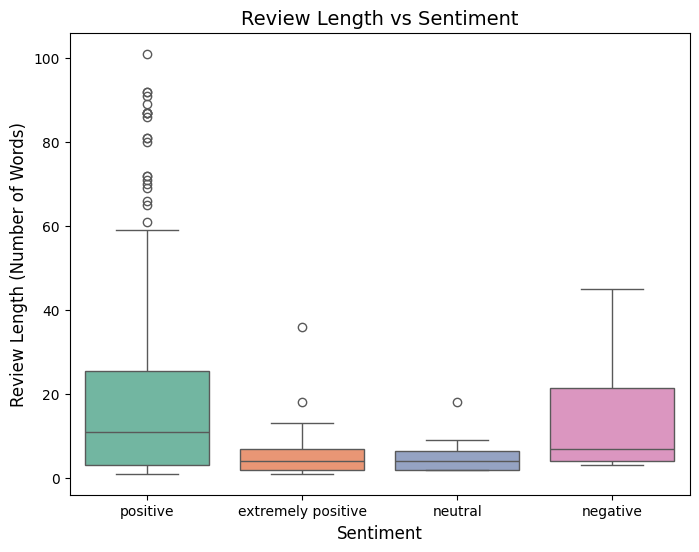

In [45]:
# Box Plot for Review Length by Sentiment
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sentiment_Class', y='Review_Length', data=new_data, hue = 'Sentiment_Class', palette='Set2')
plt.title('Review Length vs Sentiment', fontsize=14)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Review Length (Number of Words)', fontsize=12)
plt.show()


**Observations:**

<u> **Positive Sentiment:** </u>
- **Has the largest variability in review length**, with several outliers.
- **The median is higher** compared to other categories.

<u> **Extremely Positive Sentiment:** </u>
- **Has the shortest review lengths overall**, with a compact distribution and fewer outliers.

<u> **Neutral Sentiment:** </u>
- **Shows a small range of review lengths**, similar to the "Extremely Positive" category.

<u> **Negative Sentiment:** </u>
- **Exhibits a moderate range of review lengths.**
- **The median review length is smaller** than "Positive" but larger than "Extremely Positive" and "Neutral."

<u> **Interpretation:** </u>
- **Positive reviews tend to be more detailed (longer)** compared to other sentiments.
- **Extremely positive and neutral reviews are often brief**.
- **Negative reviews have varying lengths** but are generally less wordy than positive reviews.


### <span style="background-color: brown; color: white; padding: 5px; border-radius: 5px;">5. Reporting</span>

**Task:** Summarize the findings in a clear, concise report.  

---

#### <b>Sentiment Analysis Report: Flipkart Customer Reviews for iPhone 15 128GB</b>

##### 1. Overview of the Data Collection and Cleaning Process
- **Data Source**: Customer reviews were collected from Flipkart for the iPhone 15 128GB model through web scraping with the help of libraries like Selenium and BeautifulSoup .
- **Preprocessing**:
  - Reviews were cleaned by removing irrelevant characters, converting cases, and unnecessary spaces.
  - Text was tokenized to standardize the input for analysis.
  - Sentiments were classified into categories (e.g., positive, extremely positive, neutral, negative, extremely negative) using sentiment analysis techniques.

##### 2. Sentiment Analysis Results
- **Sentiment Distribution**:
  - A majority of reviews were positive, followed by extremely positive ones, as evident from the sentiment distribution graph.
  - Neutral and negative sentiments accounted for a significantly smaller proportion of the reviews.
- **Average Sentiment Per Rating**:
  - Higher star ratings were consistently associated with positive and extremely positive sentiment.
  - Lower star ratings correlated with neutral or negative sentiments, pinpointing dissatisfaction in these reviews.

##### 3. Insights
##### Positive Highlights
- Customers appreciated the **design, camera quality, and overall performance** of the iPhone 15.
- **Battery life improvements** were a common positive theme.
  
##### Common Issues
- Neutral and negative sentiments highlighted **pricing concerns** and occasional issues with **delivery or packaging**.
- A few reviews mentioned **compatibility issues** with accessories or software glitches.

##### 4. Recommendations
##### Product Improvements
- Consider addressing minor software glitches highlighted by users.
- Investigate compatibility issues with certain accessories to ensure a seamless customer experience.

##### Marketing Focus
- Highlight positive aspects like **camera performance**, **battery life**, and the **sleek design** in promotional campaigns.
- Address pricing concerns through **EMI options**, **exchange offers**, or limited-time discounts to make the product more accessible.

##### Operational Enhancements
- Improve **delivery processes** to minimize complaints about packaging or delays.
- Monitor **customer feedback** closely to resolve emerging issues quickly.


### Libraries and Tools:
#### Selenium: 
For automating the web scraping process.

#### BeautifulSoup: 
For parsing HTML and extracting review details.

#### Pandas: 
For data cleaning, processing, and analysis.

#### TextBlob: 
For performing sentiment analysis on the review text.

#### Matplotlib/Seaborn: 
For visualizations like sentiment distribution and word clouds.